In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
import pandas as pd
train = pd.read_csv('laba04_train.csv')

In [219]:
def drop_dataset(dataset):
     # APP_REGISTR_RGN_CODE
     # CLNT_JOB_POSITION   
     # MAX_PCLOSE_DATE !!!!!!
        
    dataset = dataset.drop(['ID', 'Unnamed: 0', 'PRC_ACCEPTS_A_EMAIL_LINK', 'PRC_ACCEPTS_A_POS', 
                            'PRC_ACCEPTS_A_TK', 'TURNOVER_DYNAMIC_IL_1M', 'PRC_ACCEPTS_A_AMOBILE',
                            'PRC_ACCEPTS_TK', 'PRC_ACCEPTS_A_MTP', 'CLNT_JOB_POSITION',
                            'PRC_ACCEPTS_A_ATM', 'PRC_ACCEPTS_MTP', 'CNT_ACCEPTS_MTP',
                            'TURNOVER_CC', 'REST_DYNAMIC_FDEP_3M', 'REST_DYNAMIC_IL_1M',
                            'CR_PROD_CNT_CCFP', 'CNT_ACCEPTS_TK', 'CLNT_TRUST_RELATION'], axis=1)
    
    return dataset
    

In [220]:
def drop_empty_col(dataset):
    for col in dataset.columns:
        if len(dataset[col][dataset[col].isnull()]) / len(dataset[col]) > 0.9:
            dataset = dataset.drop([col], axis=1)
    return dataset    

In [221]:
def fill_median(dataset):
    for col in dataset.columns:
        dataset[col] = dataset[col].fillna(train[col].median())
    return dataset    

In [222]:
y = train.TARGET
train = train.drop(["TARGET"], axis=1)

In [223]:
train = pd.get_dummies(train, columns=['APP_TRAVEL_PASS', 'APP_CAR', 'APP_DRIVING_LICENSE', 
                                       'APP_KIND_OF_PROP_HABITATION', 
                                       'APP_EMP_TYPE', 'APP_POSITION_TYPE', 'CLNT_JOB_POSITION_TYPE',
                                       'APP_COMP_TYPE', 'APP_EDUCATION', 'APP_MARITAL_STATUS', 'PACK'])

In [224]:
train = drop_dataset(train)
#train = drop_empty_col(train)

In [225]:
train = fill_median(train)
train.shape

(399589, 155)

In [209]:
train.describe()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,SUM_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,REST_DYNAMIC_SAVE_3M,...,PACK_103,PACK_104,PACK_105,PACK_107,PACK_108,PACK_109,PACK_301,PACK_K01,PACK_M01,PACK_O01
count,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,...,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000,399589.000000
mean,0.105741,0.039393,53.482951,0.325523,0.314638,0.079028,0.712588,0.000737,0.674479,0.063704,...,0.069909,0.018957,0.126893,0.078493,0.000010,0.000258,0.011715,0.216695,0.000013,0.142331
std,0.433181,0.103702,9.063437,0.155218,0.166418,0.135701,0.169381,0.014390,0.155139,0.203513,...,0.254994,0.136373,0.332853,0.268946,0.003164,0.016053,0.107598,0.411994,0.003537,0.349390
min,0.000000,0.000000,0.000000,0.006944,0.000000,0.000000,0.000002,0.000000,0.008000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,54.000000,0.300000,0.286712,0.000000,0.723247,0.000000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,54.000000,0.300000,0.286712,0.027080,0.723247,0.000000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.028574,54.000000,0.300000,0.286712,0.095481,0.723247,0.000000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train, 
    y, 
    test_size=0.33,
    random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [46]:
# ROC AUC 0.72007114093988478
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1, random_state=0)
lr.fit(X_train, y_train)    
    
pred = lr.predict_proba(X_test)
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
metrics.auc(fpr, tpr)
metrics.roc_auc_score(y_test, pred[:,1])

0.65458321379720008

In [47]:
pd.DataFrame(list(zip(lr.coef_[0], train.columns))).sort_values([0])

,0,1
35,-2.903541e-03,AGE
68,-2.506663e-04,DEAL_YWZ_IR_MAX
66,-2.342366e-04,DEAL_YWZ_IR_MIN
76,-8.190349e-05,CLNT_SETUP_TENOR
81,-3.083934e-05,CLNT_SALARY_VALUE
18,-1.425498e-05,REST_AVG_CUR
52,-8.352155e-06,LDEAL_AMT_MONTH
41,-7.444599e-06,SUM_TRAN_CLO_TENDENCY3M
48,-7.400360e-06,CNT_TRAN_CLO_TENDENCY3M
36,-7.282536e-06,CNT_TRAN_MED_TENDENCY3M


In [227]:
# ROC AUC 0.75283557180878979 - 0.75575844393698677 - 0.83819547948035167 - 0.83866660075959798
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train) 
pred = rfc.predict_proba(X_test)

In [228]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
metrics.auc(fpr, tpr)

0.82513391672461889

In [229]:
metrics.roc_auc_score(y_test, pred[:,1])

0.82513391672461889

In [ ]:
# 100 - 0.8242419318823454
# 300 - 0.83140138848975087
# 500 - 0.83316805013701467
# 1000- 0.83454966970256228  

In [24]:
# with open('lab04.csv', 'w') as file:
#     file.write('id' + '\t' + 'target' + '\n')
#     id_num = 0
#     for item in pred[:,1]:   
#         file.write(str(test_id[id_num]).strip() + '\t' + str(item) + '\n')
#         id_num = id_num + 1

In [25]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
metrics.auc(fpr, tpr)
metrics.roc_auc_score(y_test, pred[:,1])

0.75346055808006474

In [56]:
matplotlib inline

In [26]:
# matplotlib inline

In [ ]:
# import seaborn as sea
# sea.pairplot(train, hue="TARGET", vars=["AGE", "REST_AVG_CUR", "REST_AVG_PAYM"])

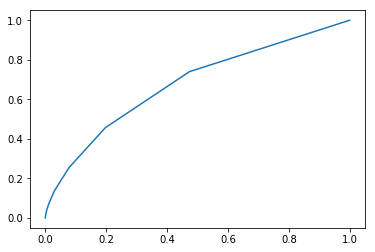

In [57]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)